# Basic Mesh Composition

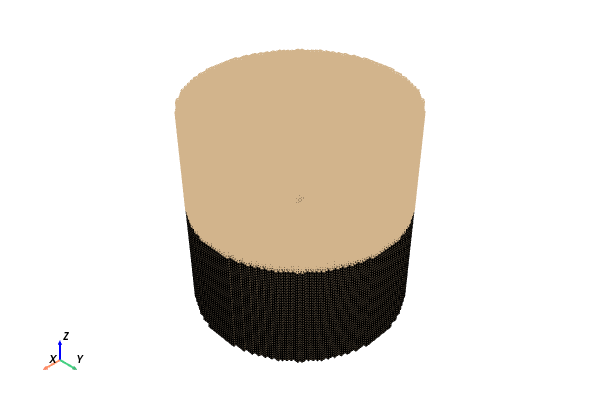

In [1]:
from dewloosh.mesh.space import CartesianFrame
from dewloosh.mesh.recipes import cylinder
from dewloosh.mesh import PolyData
from dewloosh.mesh.cells import L2, H8
from dewloosh.mesh.topo.tr import H8_to_L2
from dewloosh.math.array import minmax
import numpy as np

n_angles = 60
n_radii = 30
min_radius = 5
max_radius = 25
n_z = 20
h = 50
angle=1

shape = (min_radius, max_radius), angle, h
size = n_radii, n_angles, n_z
frame = CartesianFrame(dim=3)
cyl = cylinder(shape, size, voxelize=True, frame=frame)

coords = cyl.coords()
topo = cyl.topology()
centers = cyl.centers()

czmin, czmax = minmax(centers[:, 2])
czavg = (czmin + czmax)/2
upper = np.where(centers[:, 2] > czavg)[0]
lower = np.where(centers[:, 2] <= czavg)[0]
coordsL2, topoL2 = H8_to_L2(coords, topo[upper])

mesh = PolyData(frame=frame)
pd = PolyData(coords=coordsL2, frame=frame)
pd['lines', 'L2'] = PolyData(topo=topoL2, celltype=L2, frame=frame)
pd['bodies', 'H8'] = PolyData(topo=topo[lower], celltype=H8, frame=frame)
pd.plot(jupyter_backend='static', notebook=True, window_size=(600, 400))